# **Heart Failure Prediction Dataset Assignment** **200 marks**:

---













>  **Important Note:**  
> All code in this assignment must be **clean, readable, and well-formatted**. This includes:
>
> -  Clear and meaningful variable names  
> -  Consistent indentation and spacing  
> -  Proper use of comments to explain logic  
> -  Organized code blocks in separate cells  
> -  Avoidance of redundant or repeated code  
>
>  Submissions with poorly written or unreadable code may result in **mark deductions**, even if the logic is correct.


## ** About Dataset**

##**Context**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

##**Attribute Information**
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## **Objective:**

The objective of this assignment is to analyze a dataset related to heart disease prediction and build predictive models that can classify whether a patient is likely to have heart disease or not based on clinical and demographic attributes

### **1. Load the Data** — *[5 Marks]*
- Load dataset using pandas
- Display first few rows

---


In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### **2. Data Inspection** — *[10 Marks]*
- Shape of data
- Info (data types, nulls)
- Value counts for each column

---


In [94]:
df.shape

(918, 12)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### **3. Data Cleaning** — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables
- Convert data types if required

---


In [96]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [97]:
df[df.duplicated()].sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0.0


In [98]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for col in columns:
  df[col] = encoder.fit_transform(df[col])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0



### **4. Outlier Detection & Treatment** — *[10 Marks]*

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns


def boxplot(df,col):
  plt.figure(figsize=(8,6))
  sns.boxplot(data=df,x=col)
  plt.title(f'{col} distribution')


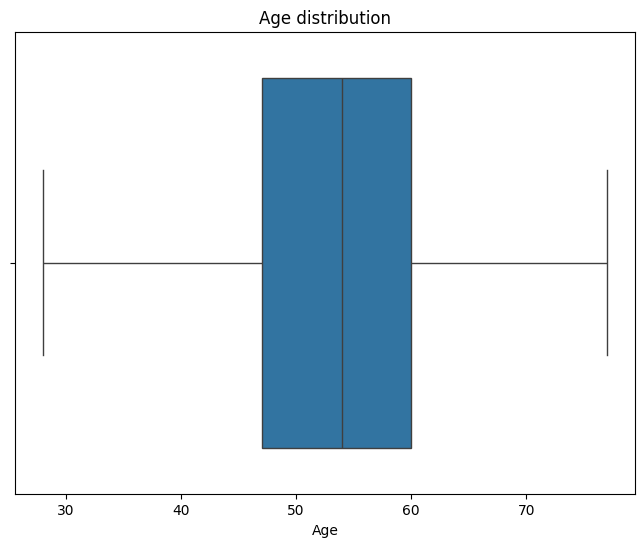

In [101]:
boxplot(df,'Age')

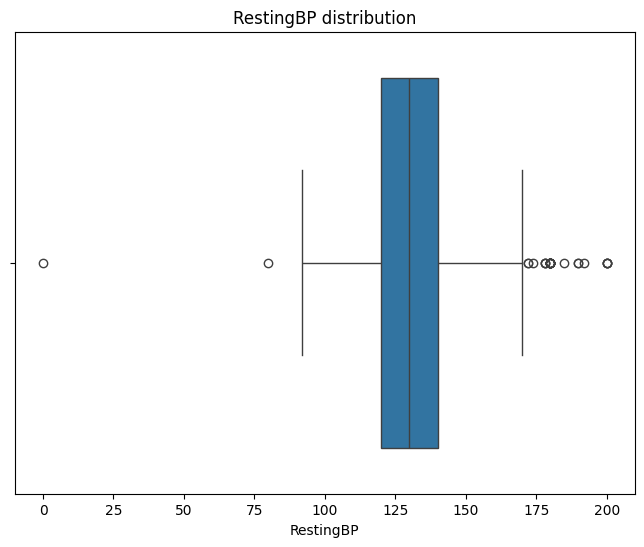

In [102]:
boxplot(df,'RestingBP')

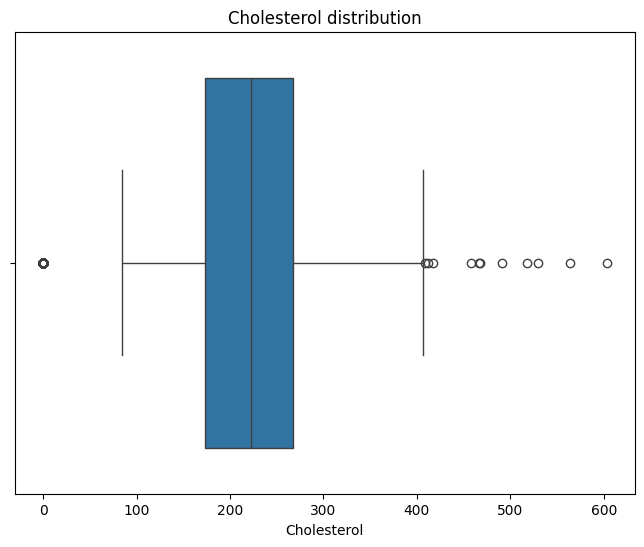

In [103]:
boxplot(df,'Cholesterol')

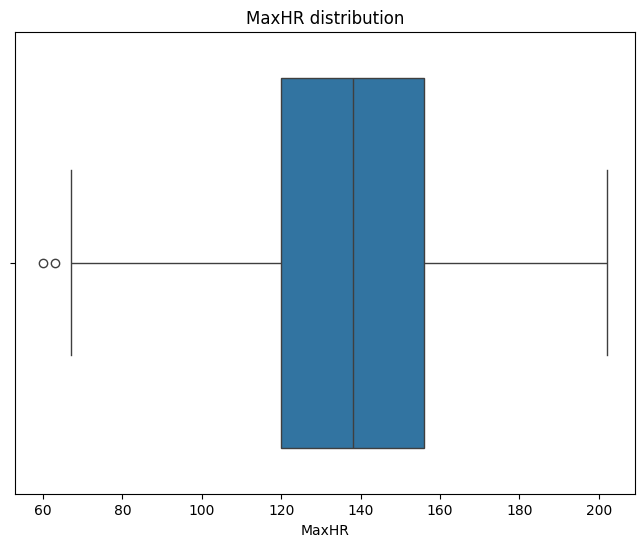

In [104]:
boxplot(df,'MaxHR')

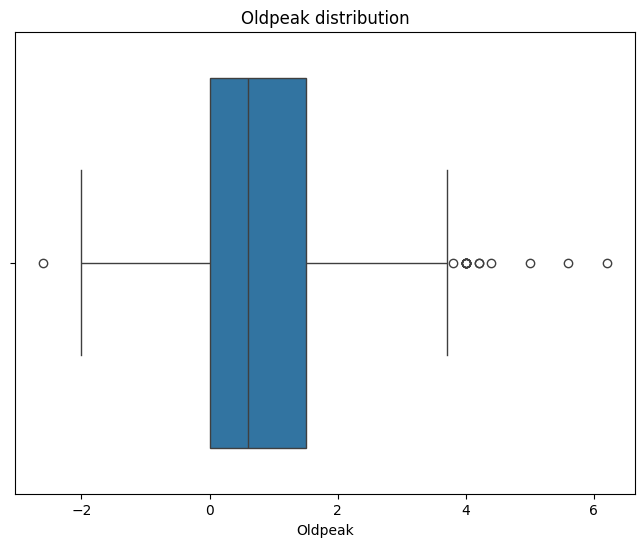

In [105]:
boxplot(df,'Oldpeak')

In [106]:
outlier_columns = ['RestingBP','Cholesterol','MaxHR','Oldpeak']

# Filtering outliers

print("Original df shape",df.shape)

for col1 in outlier_columns:
  print(f"Removing outlier for {col1}")
  # calculating the Q1 and Q3 for feature
  q1 = np.percentile(df[col1],25)
  q3 = np.percentile(df[col1],75)
  iqr = q3 - q1

  # defining lower and upper bound

  lbound = q1 - 1.5 * iqr
  ubound = q3 + 1.5 * iqr


  df= df[(df[col1]>= lbound) & (df[col1]<= ubound)]
  print(f'Shape of df after removing outliers for {col1}',df.shape)


Original df shape (918, 12)
Removing outlier for RestingBP
Shape of df after removing outliers for RestingBP (890, 12)
Removing outlier for Cholesterol
Shape of df after removing outliers for Cholesterol (713, 12)
Removing outlier for MaxHR
Shape of df after removing outliers for MaxHR (713, 12)
Removing outlier for Oldpeak
Shape of df after removing outliers for Oldpeak (701, 12)


### **5. Data Description** — *[10 Marks]*
- Describe numerical features (mean, std, min, max)
- Unique values for categorical variables

---


In [107]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,701.0,52.723252,9.542111,28.0,46.0,54.0,59.0,77.0
Sex,701.0,0.760342,0.427179,0.0,1.0,1.0,1.0,1.0
ChestPainType,701.0,0.860200,0.959389,0.0,0.0,1.0,2.0,3.0
RestingBP,701.0,131.544936,15.428074,92.0,120.0,130.0,140.0,170.0
Cholesterol,701.0,239.475036,50.338211,85.0,206.0,235.0,272.0,394.0
FastingBS,701.0,0.162625,0.369287,0.0,0.0,0.0,0.0,1.0
RestingECG,701.0,0.928673,0.628415,0.0,1.0,1.0,1.0,2.0
MaxHR,701.0,140.573466,24.370341,71.0,122.0,140.0,160.0,202.0
ExerciseAngina,701.0,0.373752,0.484144,0.0,0.0,0.0,1.0,1.0
Oldpeak,701.0,0.829244,0.959398,-0.1,0.0,0.4,1.5,3.6



### **6. Univariate Analysis** — *[20 Marks]*
Analyze **each column individually**, one by one. No common loop functions allowed. Include:
- Histograms for numerical variables
- Bar plots for categorical
- Comments on distributions

---


In [108]:
def histogram(data,col):
  plt.figure(figsize=(8,4))
  sns.histplot(data=df,x=col,bins=30,kde=True)
  plt.title(f'{col} distribution')

def countplot(col,data):
  plt.figure(figsize=(8,4))
  sns.countplot(x=col,data=df)
  plt.title(f'{col} distribution')
  print(df[col].value_counts())


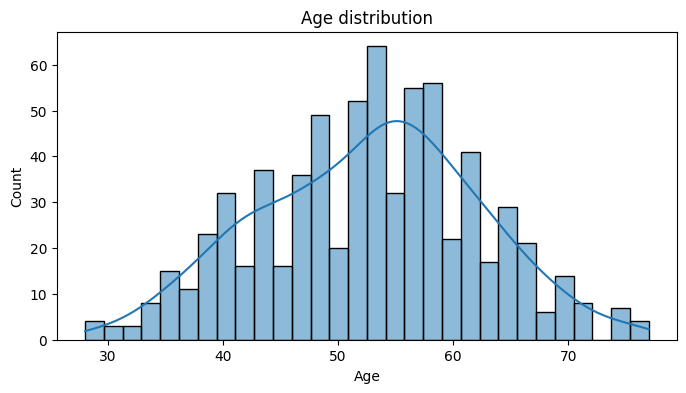

In [109]:
histogram(df,'Age')

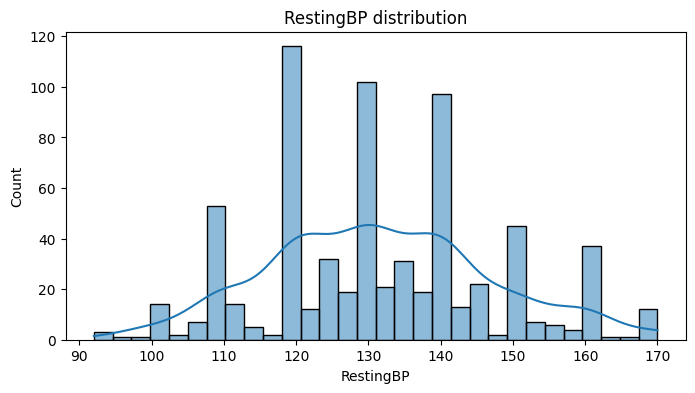

In [110]:
histogram(df,'RestingBP')

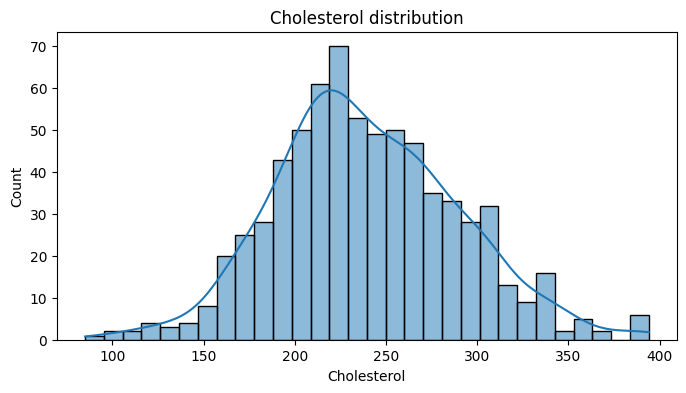

In [111]:
histogram(df,'Cholesterol')

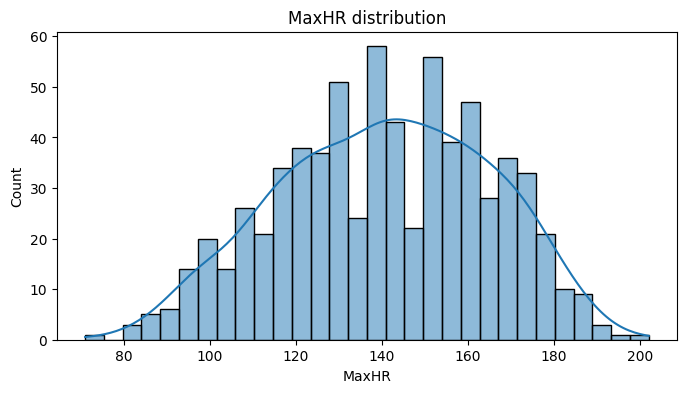

In [112]:
histogram(df,'MaxHR')

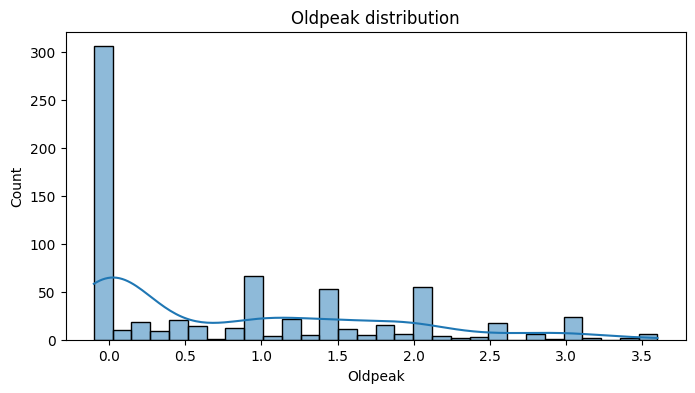

In [113]:
histogram(df,'Oldpeak')

Sex
1    533
0    168
Name: count, dtype: int64


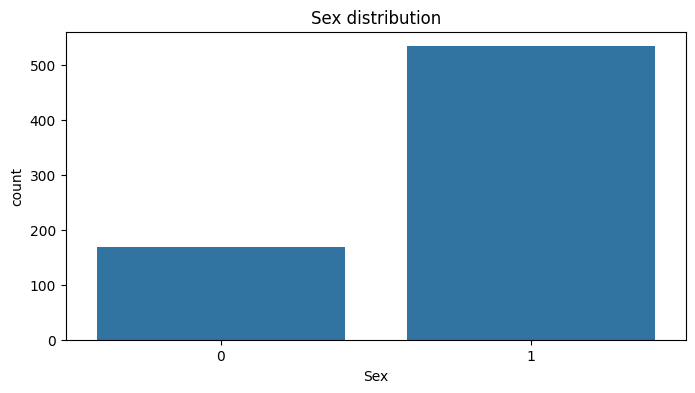

In [114]:
countplot('Sex',df)

ChestPainType
0    339
2    163
1    160
3     39
Name: count, dtype: int64


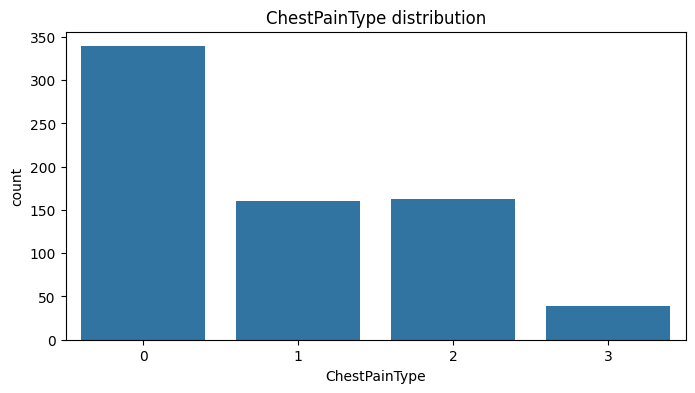

In [115]:
countplot('ChestPainType',df)

FastingBS
0    587
1    114
Name: count, dtype: int64


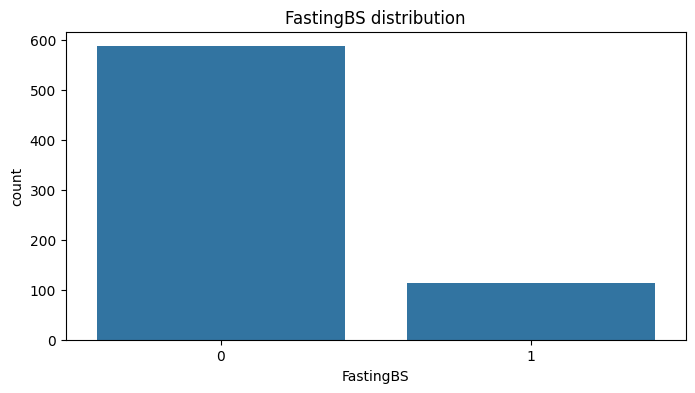

In [116]:
countplot('FastingBS',df)

RestingECG
1    421
0    165
2    115
Name: count, dtype: int64


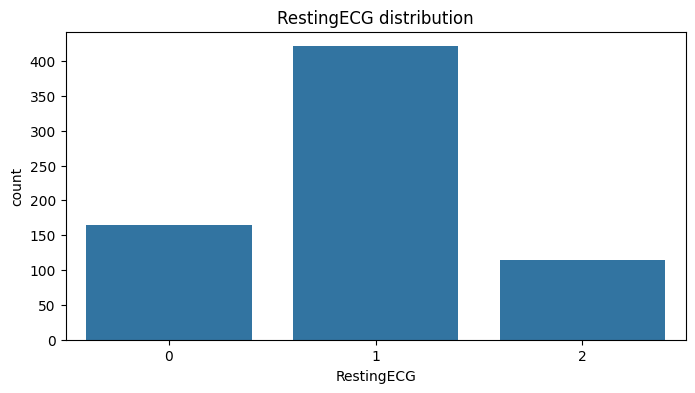

In [117]:
countplot('RestingECG',df)

ExerciseAngina
0    439
1    262
Name: count, dtype: int64


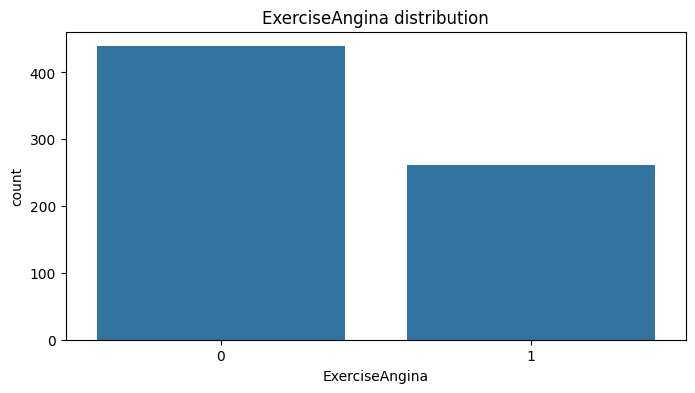

In [118]:
countplot('ExerciseAngina',df)

ST_Slope
2    338
1    331
0     32
Name: count, dtype: int64


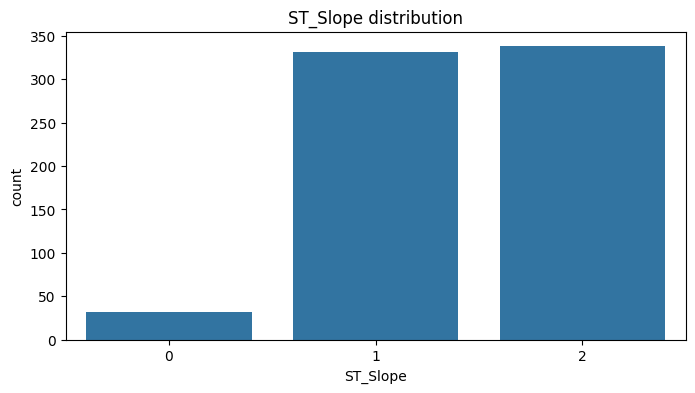

In [119]:
countplot('ST_Slope',df)

### **7. Bivariate Analysis** — *[20 Marks]*
Analyze the relationship of **each independent variable** with the target variable `HeartDisease`.
- Box plots, violin plots, groupby means
- Separate plots/analysis for each column

---


In [120]:
# For numerical vs categorical column

def histplot(dataframe,col_num,col_cat,kde=True):
  plt.figure(figsize=(8,4))
  sns.histplot(data=dataframe, x = col_num, y= col_cat)
  plt.title(f'{col_num} vs {col_cat} distribution')




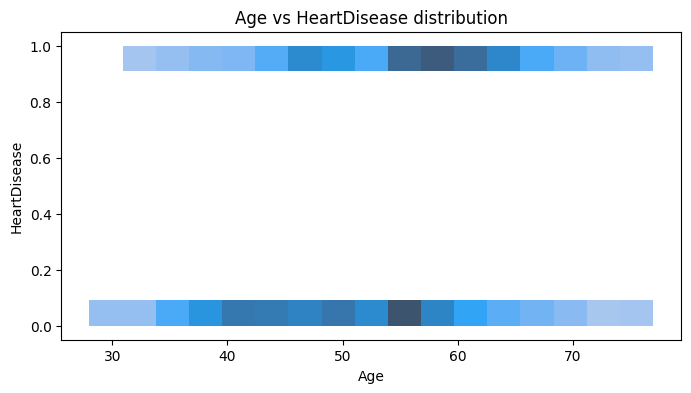

In [121]:
histplot(df,'Age','HeartDisease')

In [122]:
def boxplot_bivariate(col_num):
  plt.figure(figsize=(8,4))
  sns.boxplot( x = df[col_num], hue= df['HeartDisease'],data=df )
  plt.title(f'{col_num} vs HeartDisease distribution')

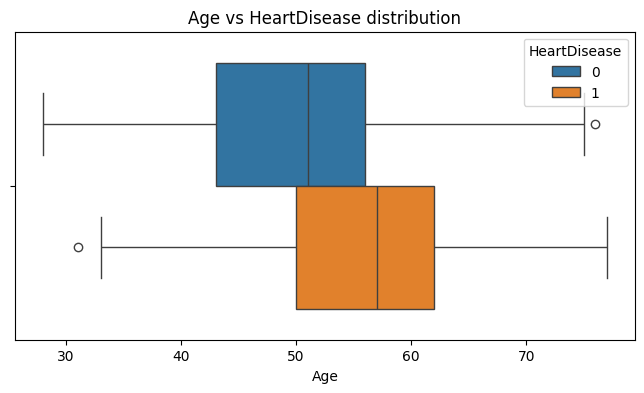

In [123]:
boxplot_bivariate('Age')

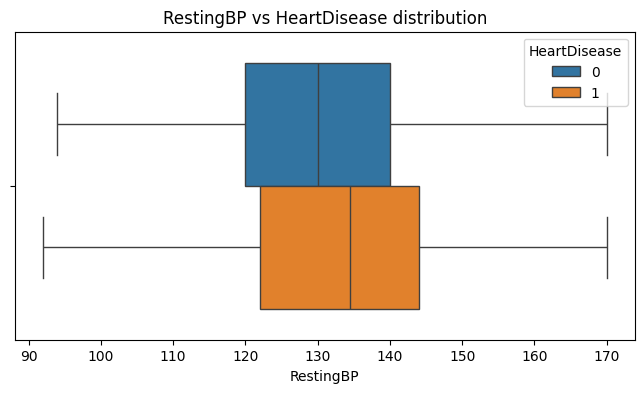

In [124]:
boxplot_bivariate('RestingBP')

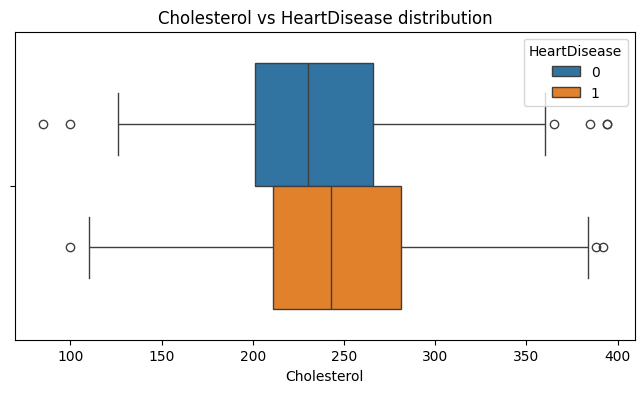

In [125]:
boxplot_bivariate('Cholesterol')

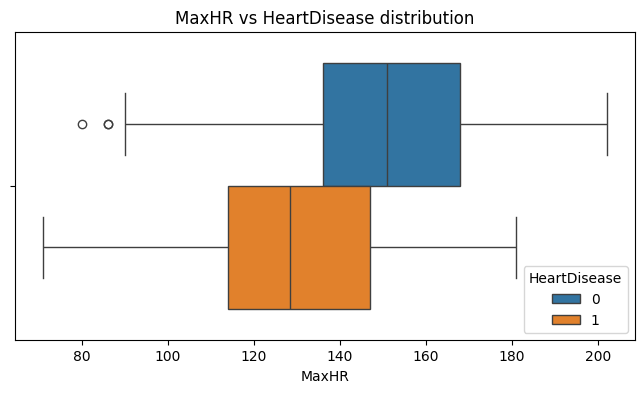

In [126]:
boxplot_bivariate('MaxHR')

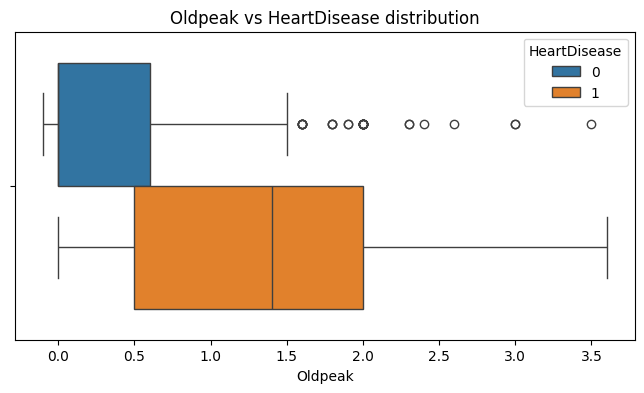

In [127]:
boxplot_bivariate('Oldpeak')

In [128]:
# For categorical vs categorical column

def cross_tab(col_cat):
  return pd.crosstab(df[col_cat],df['HeartDisease'])

In [129]:
cross_tab('Sex')


HeartDisease,0,1
Sex,,
0,136,32
1,241,292


In [130]:
cross_tab('ChestPainType')

HeartDisease,0,1
ChestPainType,,
0,91,248
1,142,18
2,119,44
3,25,14


In [131]:
cross_tab('FastingBS')

HeartDisease,0,1
FastingBS,,
0,337,250
1,40,74


In [132]:
cross_tab('RestingECG')

HeartDisease,0,1
RestingECG,,
0,78,87
1,249,172
2,50,65


In [133]:
cross_tab('ExerciseAngina')

HeartDisease,0,1
ExerciseAngina,,
0,329,110
1,48,214


In [134]:
cross_tab('ST_Slope')

HeartDisease,0,1
ST_Slope,,
0,9,23
1,73,258
2,295,43


### **8. Multivariate Analysis** — *[10 Marks]*
- Pairplot
- Interactions between 2+ variables
- Comments on how combinations impact heart disease

---


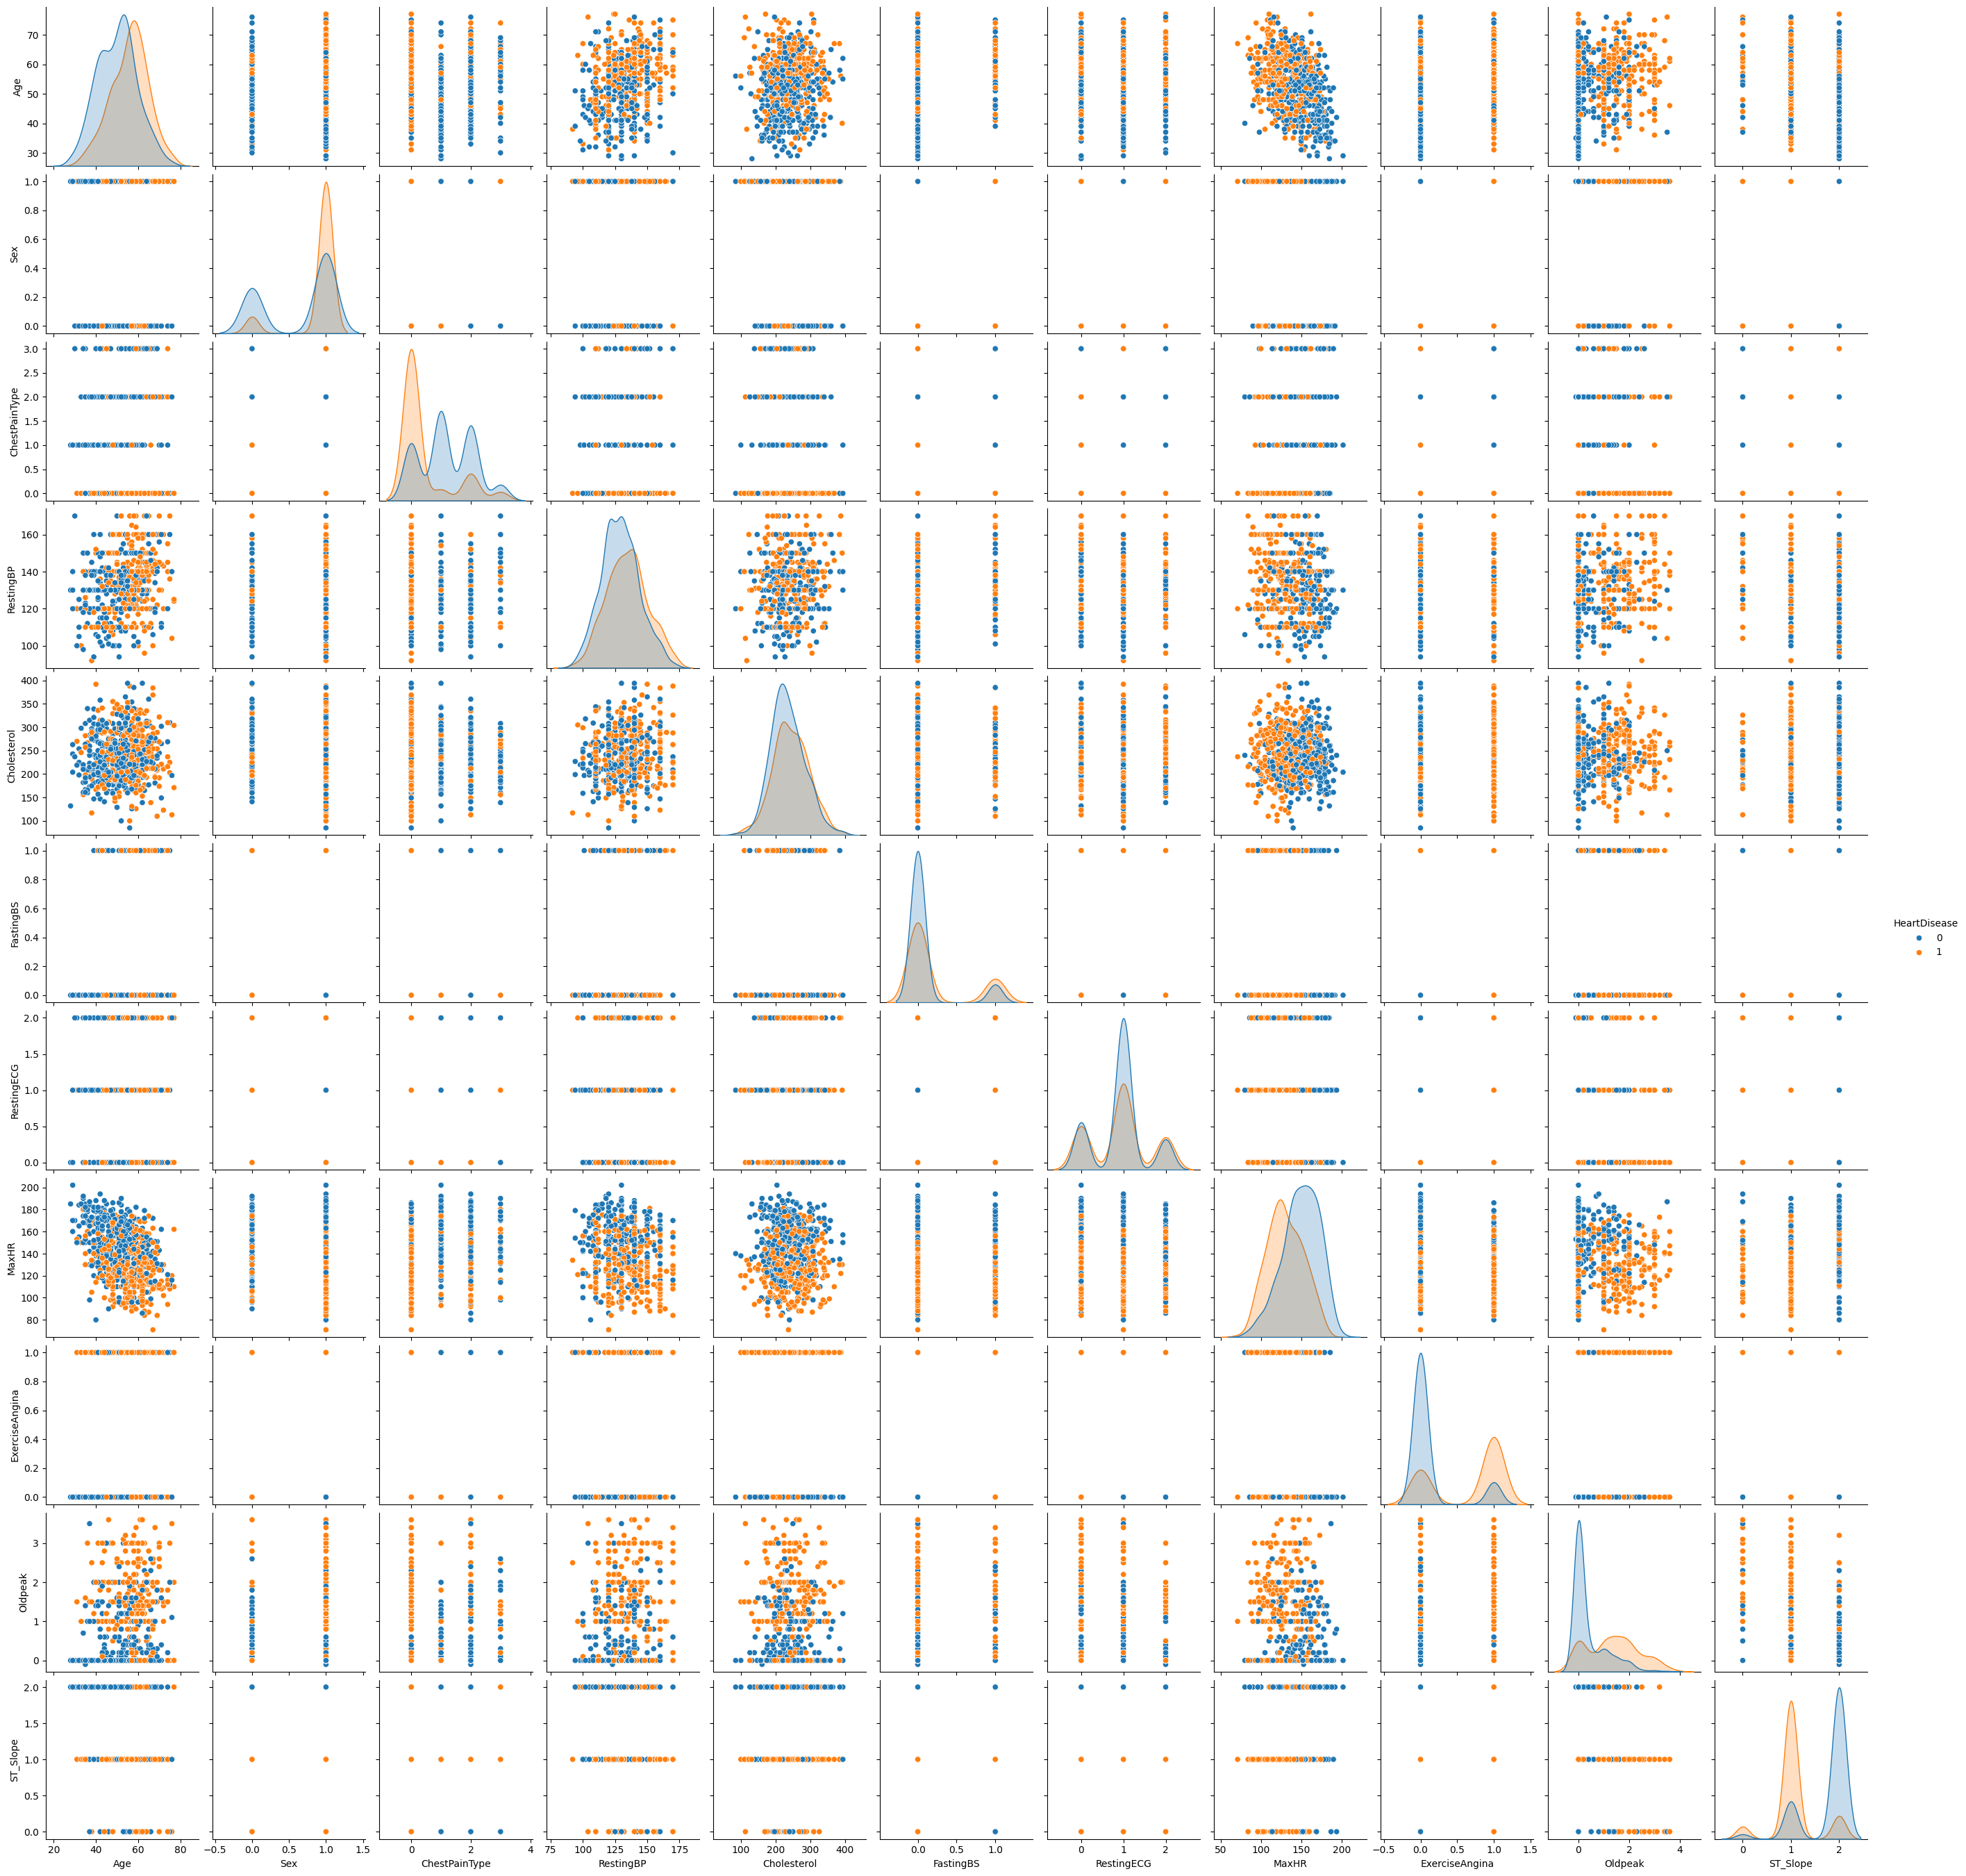

In [135]:
sns.pairplot(df,hue='HeartDisease',diag_kind='kde')

### **9. Heatmap - Correlation Matrix** — *[10 Marks]*
- Correlation matrix
- Use `seaborn.heatmap()`
- Identify top correlations with target

---


In [136]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler()

df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaled_data.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.334331,1,1,0.548422,0.984547,0,1,1.290461,0,-0.864955,2,0
1,-0.390470,0,2,1.845686,-1.182352,0,1,0.633456,0,0.178110,1,1
2,-1.648952,1,1,-0.100209,0.865268,0,2,-1.748185,0,-0.864955,2,0
3,-0.495344,0,0,0.418696,-0.506439,0,1,-1.337557,1,0.699642,1,1
4,0.133897,1,2,1.197054,-0.884155,0,1,-0.762678,0,-0.864955,2,0


<Axes: >

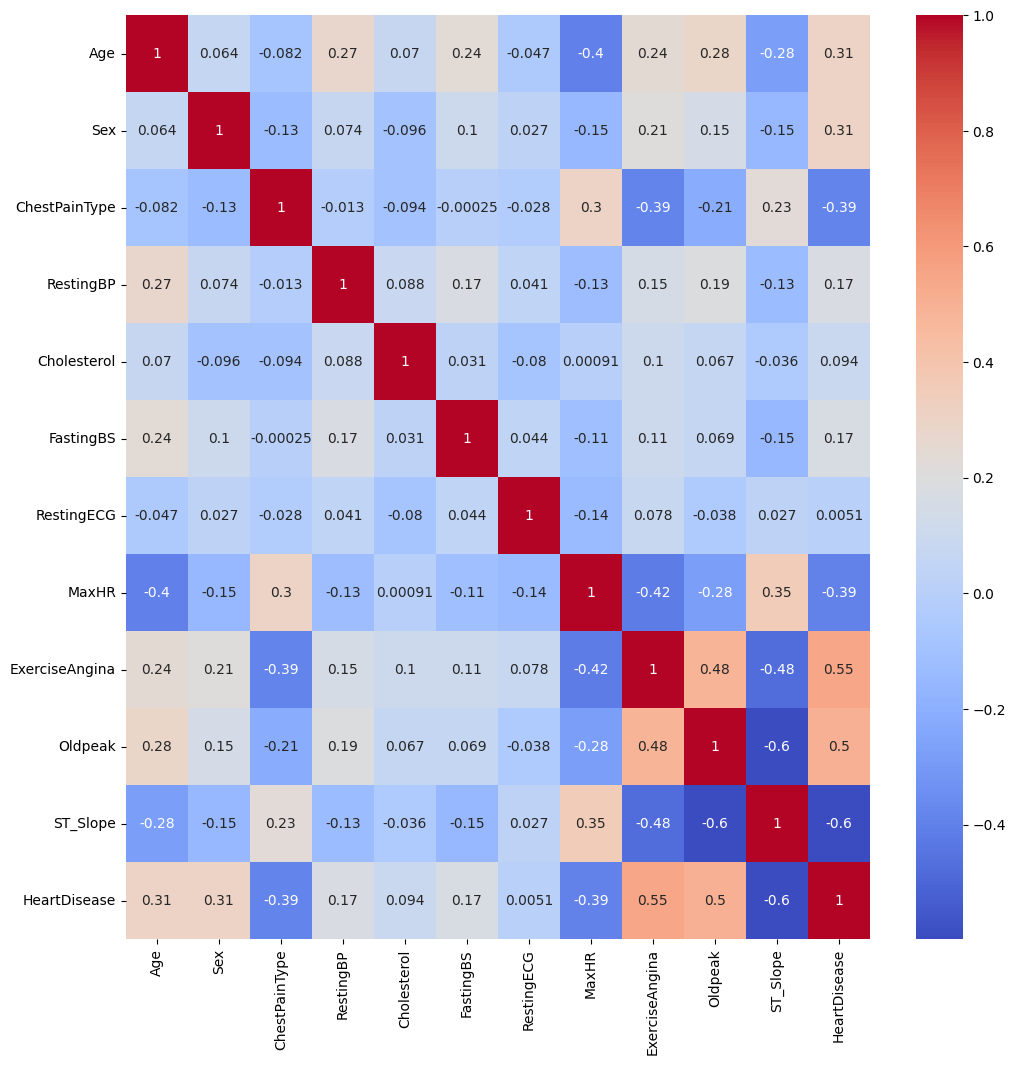

In [137]:
plt.figure(figsize=(12,12))

sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm')


### **10. Model Building** — *[50 Marks]*
Build the following classification models:
- Logistic Regression
- Naive Bayes (choose appropriate types)
- K-Nearest Neighbors (KNN)
- Decision Tree
- Support Vector Machine (SVM)
- Random Forest
- Bagging Classifier
- Boosting Algorithms:
  - AdaBoost
  - Gradient Boosting (GBM)
  - XGBoost
- Stacking Ensemble
- Voting Classifier

---



In [138]:
## Logistic Regression

from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [139]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [140]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8439716312056738

In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        67
           1       0.86      0.84      0.85        74

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141



In [142]:
## NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train,y_train)

GaussianNB()

In [143]:
nb_training_accuracy = nb_model.score(X_train,y_train)
nb_training_accuracy

0.8464285714285714

In [144]:
y_pred_nb = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test,y_pred_nb)
nb_accuracy

0.851063829787234

In [145]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        67
           1       0.87      0.84      0.86        74

    accuracy                           0.85       141
   macro avg       0.85      0.85      0.85       141
weighted avg       0.85      0.85      0.85       141



In [146]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred_nb))

[[58  9]
 [12 62]]


In [147]:
## K-Fold cross validation

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(nb_model,X_train,y_train, cv=10)

print("CV Scores: ", cv_score)
print(f"Avg CV accuracy: {np.mean(cv_score)*100:.2f}")

CV Scores:  [0.85714286 0.78571429 0.875      0.875      0.875      0.78571429
 0.85714286 0.83928571 0.78571429 0.875     ]
Avg CV accuracy: 84.11


In [148]:
X_train.shape
np.sqrt(560)

np.float64(23.664319132398465)

In [149]:
### KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)

knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [150]:
knn_training_accuracy = knn_model.score(X_train,y_train)
knn_training_accuracy

0.8571428571428571

In [151]:
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test,y_pred_knn)

0.8368794326241135

In [152]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        67
           1       0.86      0.82      0.84        74

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141



In [153]:
confusion_matrix(y_test,y_pred_knn)

array([[57, 10],
       [13, 61]])

In [154]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10)

In [155]:
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

0.8439716312056738

In [156]:
# Decision Tree
from sklearn.model_selection import GridSearchCV

dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [157]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10)

In [158]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        67
           1       0.86      0.84      0.85        74

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141



In [159]:
confusion_matrix(y_test,y_pred_dt)

array([[57, 10],
       [12, 62]])

In [160]:
### SVM

from sklearn.svm import SVC

svm_model = SVC(C=0.1, degree=2, kernel='linear')

svm_model.fit(X_train,y_train)

SVC(C=0.1, degree=2, kernel='linear')

In [161]:
y_pred_svm = svm_model.predict(X_test)

accuracy_score(y_test,y_pred_svm)

0.8652482269503546

In [162]:
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    # 'gamma': ['scale', 'auto'],
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [163]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100,oob_score=True)

rfc_model.fit(X_train,y_train)



RandomForestClassifier(oob_score=True)

In [164]:
y_pred_rf = rfc_model.predict(X_test)

accuracy_score(y_test,y_pred_rf)

0.900709219858156

In [165]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        67
           1       0.91      0.91      0.91        74

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141



In [166]:
confusion_matrix(y_test,y_pred_rf)

array([[60,  7],
       [ 7, 67]])

In [167]:
## Adaboost

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

abc_model = AdaBoostClassifier()

abc_model.fit(X_test,y_test)

AdaBoostClassifier()

In [168]:
y_pred_abc = abc_model.predict(X_test)

accuracy_score(y_test,y_pred_abc)

0.9716312056737588

In [169]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.99      0.96      0.97        74

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [170]:
confusion_matrix(y_test,y_pred_abc)

array([[66,  1],
       [ 3, 71]])

In [171]:
## Gradient Boosting

gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [172]:
y_pred_gbc = model.predict(X_test)

accuracy_score(y_test,y_pred_gbc)

0.8439716312056738

In [173]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        67
           1       0.86      0.84      0.85        74

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141



In [174]:
confusion_matrix(y_test,y_pred_gbc)

array([[57, 10],
       [12, 62]])

In [175]:
## XGBoost

xgb_model = XGBClassifier()

xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [176]:
y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test,y_pred_xgb)

0.8936170212765957

In [177]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        67
           1       0.90      0.89      0.90        74

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141



In [178]:
confusion_matrix(y_test,y_pred_xgb)

array([[60,  7],
       [ 8, 66]])

In [179]:
## Stacking Ensemble

from sklearn.ensemble import StackingClassifier




base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]


meta_model = LogisticRegression()


stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


stacking_clf.fit(X_train, y_train)


y_pred_stacking = stacking_clf.predict(X_test)

accuracy_score(y_test, y_pred_stacking)


0.8936170212765957

In [180]:
## Voting Classifier

from sklearn.ensemble import VotingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

vc_model = VotingClassifier(estimators=base_models,voting='hard')

vc_model.fit(X_train,y_train)

y_pred_vc = vc_model.predict(X_test)

accuracy_score(y_test,y_pred_vc)

0.900709219858156

### **11. Model Evaluation** — *[20 Marks]*
- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- ROC-AUC Curve (where applicable)

---


### **12. Interpretation of Metrics** — *[10 Marks]*
- Explain what the evaluation metrics mean
- Discuss trade-offs (e.g., precision vs recall)

---



### **13. Final Conclusion** — *[10 Marks]*
- Summarize findings
- Which model performed best?
- Possible improvements

---

 **Total: 200 Marks**


In [181]:
#Adaboost model has best accuracy with 97%